## Problem Statement
- LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.
- We'll be performing EDA to check impactful data variable, feature engineering, feature selection, outlier detection and feature importance.
- Then We'll train a logistic model to answer the question of whom to give the loan.
- Evaluation metrics like precision, recall will be used to reduce false positives and also not lose on opportunity cost and answer some business problems based on our model output.

In [1324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,ConfusionMatrixDisplay,f1_score,classification_report,roc_curve

In [1325]:
df = pd.read_csv('logistic_regression.txt')

In [1326]:
df = df[df['application_type']=='INDIVIDUAL']

In [1327]:
df.shape

(395319, 27)

In [1328]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,395319.000000,395319,395319.000000,395319.000000,395319,395319,372466,377092,395319,3.953190e+05,...,395319.000000,395319.000000,3.953190e+05,395043.000000,395319.000000,395319,395319,357524.000000,394784.000000,395319
unique,NaN,2,NaN,NaN,7,35,172922,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,392997
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USS Johnson\r\nFPO AE 48052
freq,NaN,301558,NaN,NaN,115900,26630,4372,125807,197935,NaN,...,NaN,NaN,NaN,NaN,NaN,237849,395319,NaN,NaN,8
mean,14108.685770,NaN,13.633423,431.691933,NaN,NaN,NaN,NaN,NaN,7.423157e+04,...,11.308493,0.178112,1.583877e+04,53.784911,25.410231,NaN,NaN,1.814119,0.121585,NaN
std,8354.421699,NaN,4.468309,250.646290,NaN,NaN,NaN,NaN,NaN,6.167509e+04,...,5.135945,0.530647,2.058653e+04,24.454465,11.885816,NaN,NaN,2.148545,0.356116,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.023000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.117800e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.220000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.961200e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [1329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395319 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395319 non-null  float64
 1   term                  395319 non-null  object 
 2   int_rate              395319 non-null  float64
 3   installment           395319 non-null  float64
 4   grade                 395319 non-null  object 
 5   sub_grade             395319 non-null  object 
 6   emp_title             372466 non-null  object 
 7   emp_length            377092 non-null  object 
 8   home_ownership        395319 non-null  object 
 9   annual_inc            395319 non-null  float64
 10  verification_status   395319 non-null  object 
 11  issue_d               395319 non-null  object 
 12  loan_status           395319 non-null  object 
 13  purpose               395319 non-null  object 
 14  title                 393654 non-null  object 
 15  

## Univariate Analysis

In [1330]:
def plot_univariate_numerical(df,key,title):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title)


    sns.boxplot(ax=axes[0], x=df[key])
    axes[0].set_title('Boxplot for {}'.format(title))


    sns.kdeplot(ax=axes[1], x=df[key])
    axes[1].set_title('KDE Plot for {}'.format(title))


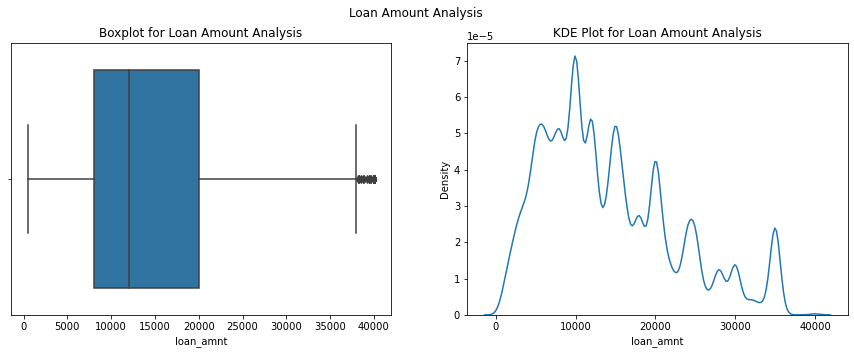

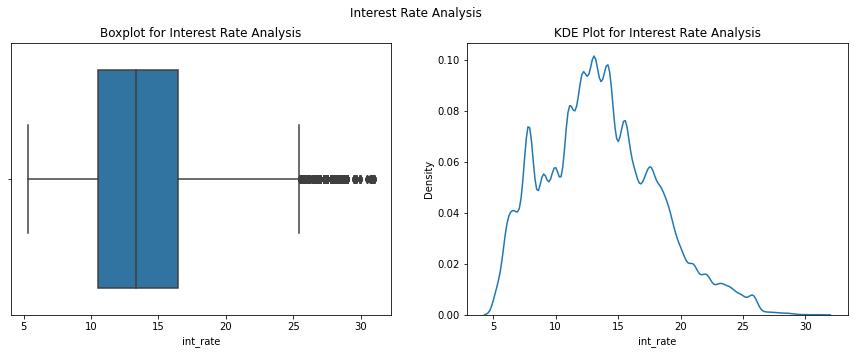

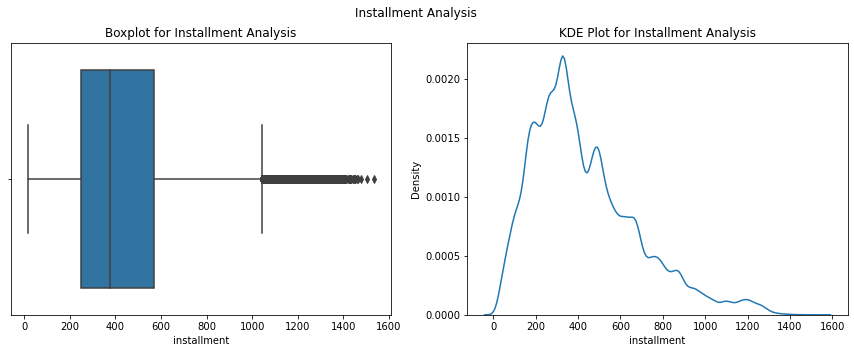

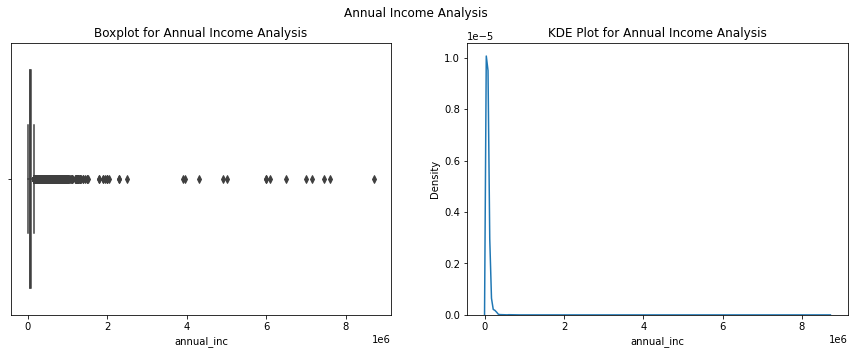

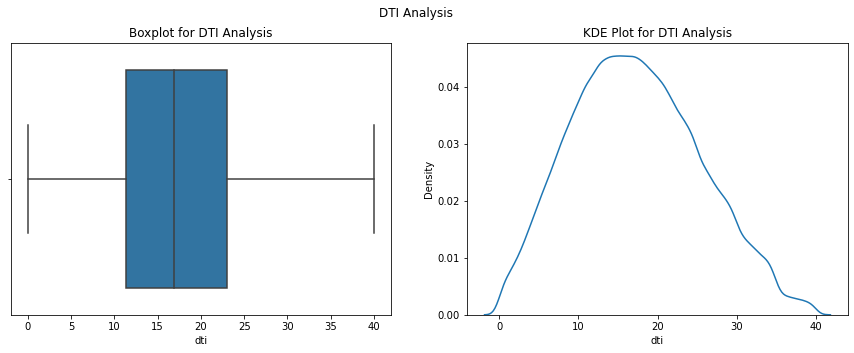

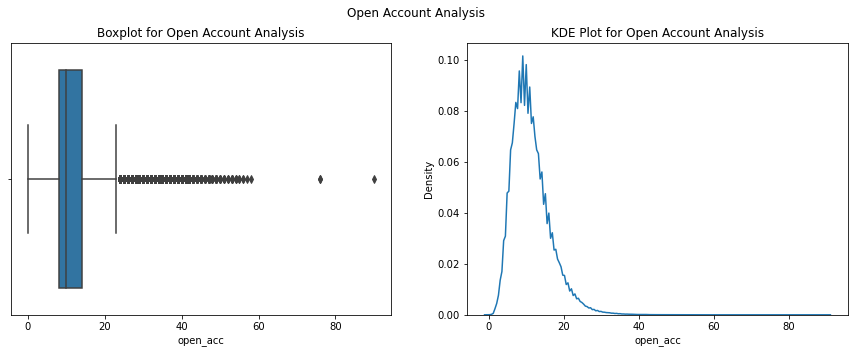

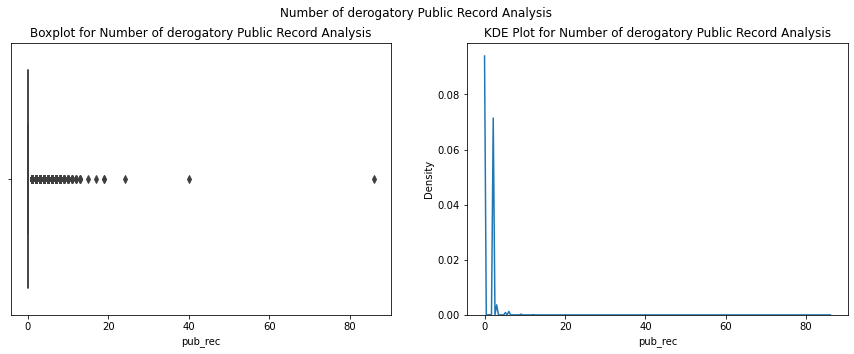

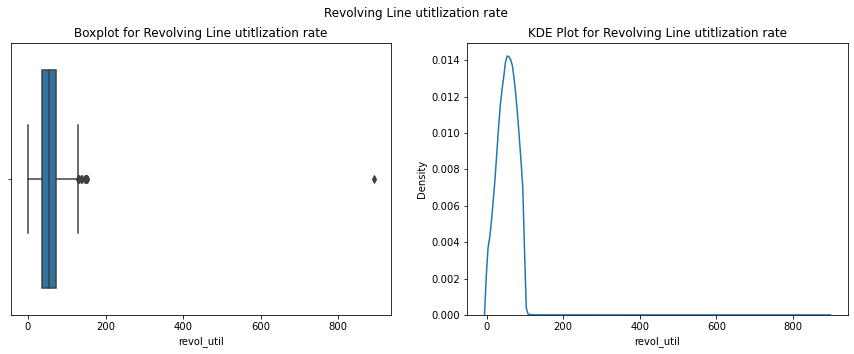

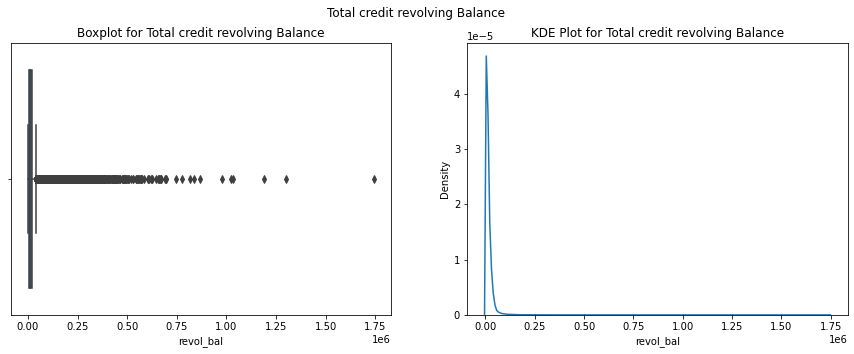

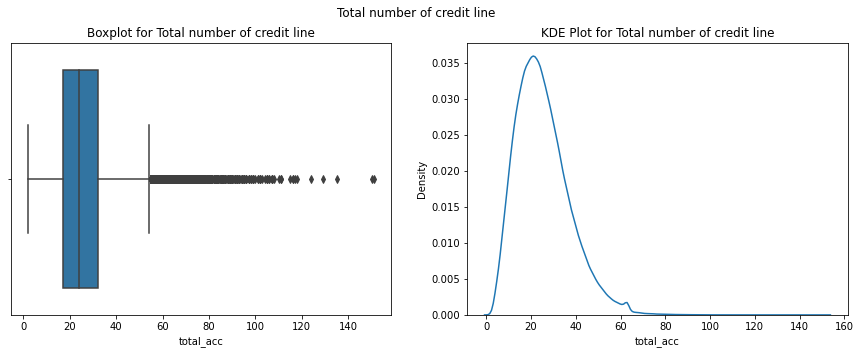

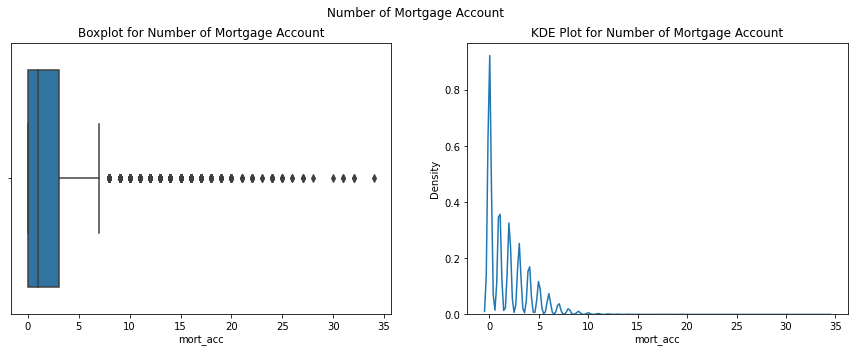

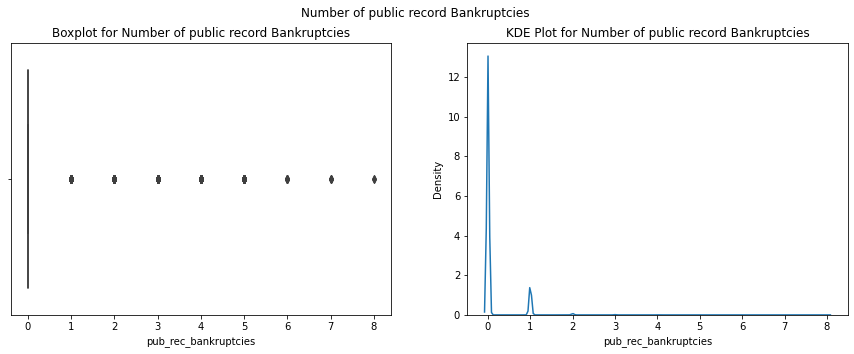

In [1331]:
column = {'loan_amnt':'Loan Amount Analysis','int_rate':'Interest Rate Analysis',
          'installment':'Installment Analysis','annual_inc':'Annual Income Analysis','dti': 'DTI Analysis',
         'open_acc':'Open Account Analysis','pub_rec':'Number of derogatory Public Record Analysis',
         'revol_util':'Revolving Line utitlization rate','revol_bal':'Total credit revolving Balance',
         'total_acc':'Total number of credit line',
         'mort_acc':'Number of Mortgage Account','pub_rec_bankruptcies':'Number of public record Bankruptcies'}


for key,desc in column.items():
    plot_univariate_numerical(df,key,desc)


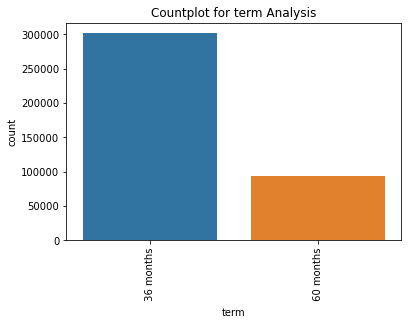

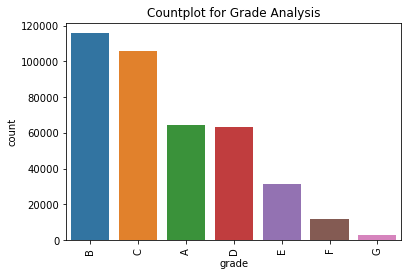

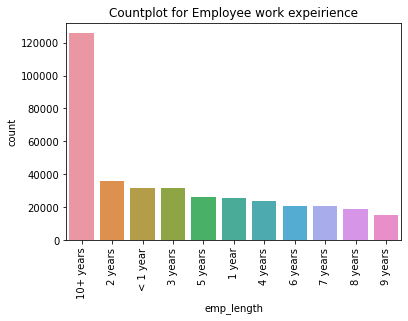

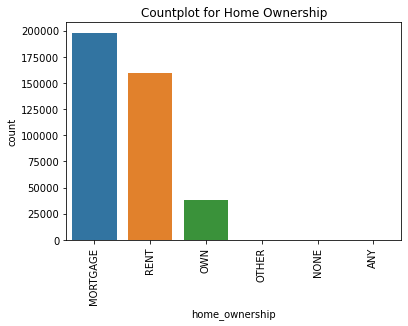

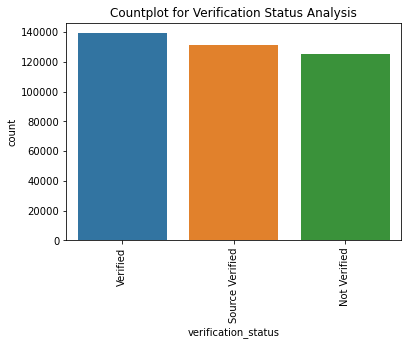

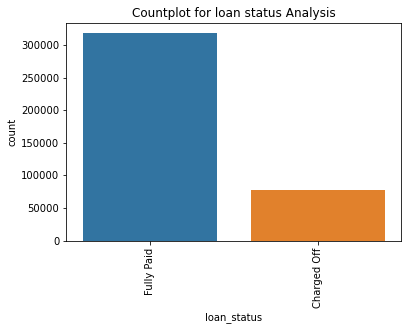

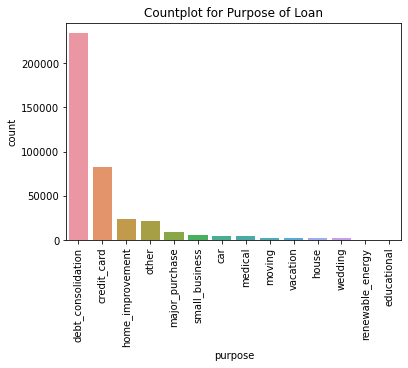

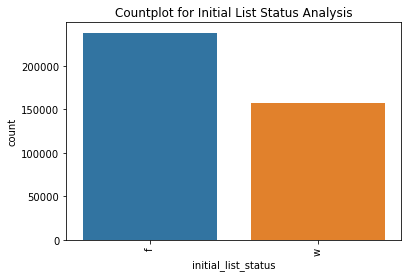

In [1332]:
def plot_univariate_categorical(df,key,title):

    sns.countplot(x=df[key],
                 order = df[key].value_counts().index)
    plt.title('Countplot for {}'.format(title))
    plt.xticks(rotation=90)

    plt.show()
#axes[0].set_title()

categorical_columns = {'term':'term Analysis','grade':'Grade Analysis',
                      'emp_length':'Employee work expeirience','home_ownership':'Home Ownership',
                      'verification_status':'Verification Status Analysis',
                      'loan_status':'loan status Analysis','purpose':'Purpose of Loan',
                      'initial_list_status':'Initial List Status Analysis'}

for key,desc in categorical_columns.items():
    plot_univariate_categorical(df,key,desc)

<AxesSubplot:>

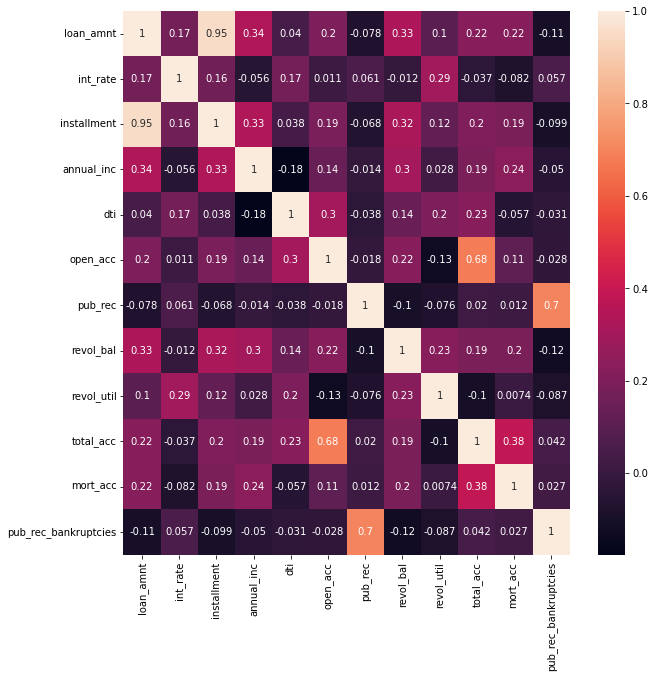

In [1333]:
## Removing useless columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [1334]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

[]

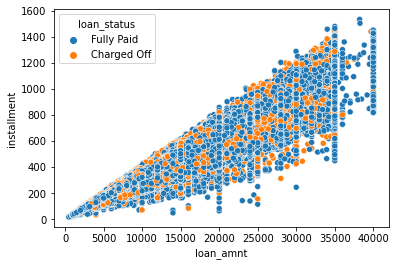

In [1335]:
sns.scatterplot(x=df['loan_amnt'],y=df['installment'],hue=df['loan_status'])
plt.plot()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


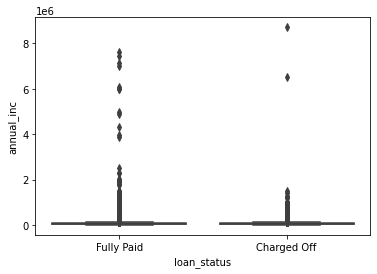

In [1336]:
sns.boxplot(df['loan_status'],df['annual_inc'])
plt.show()

In [1337]:
df.groupby(['home_ownership','loan_status'])['loan_status'].count()

home_ownership  loan_status
ANY             Fully Paid          3
MORTGAGE        Charged Off     33564
                Fully Paid     164371
NONE            Charged Off         7
                Fully Paid         24
OTHER           Charged Off        16
                Fully Paid         96
OWN             Charged Off      7788
                Fully Paid      29877
RENT            Charged Off     36142
                Fully Paid     123431
Name: loan_status, dtype: int64

[]

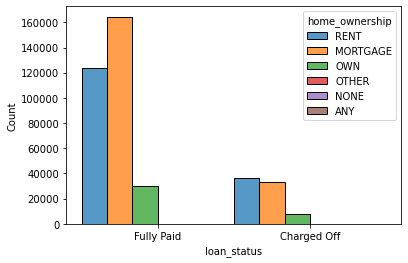

In [1338]:
sns.histplot(binwidth=1,
            x='loan_status',
            hue='home_ownership',
            data=df,
            stat="count",
            multiple="dodge")
plt.plot()

[]

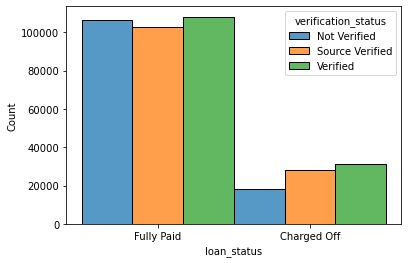

In [1339]:
sns.histplot(binwidth=1,
            x='loan_status',
            hue='verification_status',
            data=df,
            stat="count",
            multiple="dodge")
plt.plot()

[]

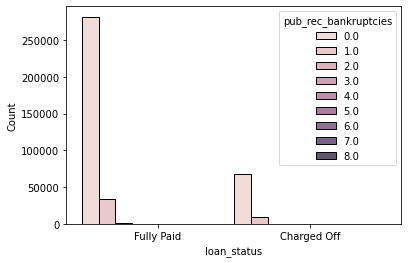

In [1340]:
sns.color_palette("hls", 8)
sns.histplot(binwidth=1,
            x='loan_status',
            hue='pub_rec_bankruptcies',
            data=df,
            stat="count",
            multiple="dodge"
            )
plt.plot()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti', ylabel='loan_status'>

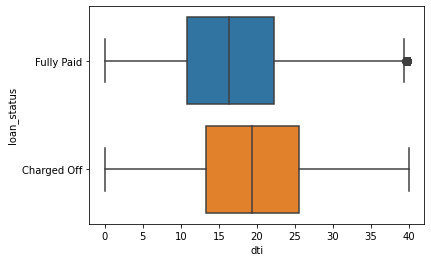

In [1341]:
sns.boxplot(df['dti'],df['loan_status'])

<div class="alert alert-block alert-info">
<b>Comments:</b><br> 
- Most of the people take loan for debt consolidation, credit card payment and home improvement.</br>
- People with High Annual income generally pay off their loan except few exceptions.</br>
- The home_ownership is in the order of mortgage,rent and own.</br>
- Pub_rec and pub_rec_bankruptcies are highly correlated.</br>
- Mostly people with 10+ employment length apply for a loan.</br>
- People with low dti are more likely to pay off the loan in comparision to people with high dti.
</div>

## Data Preprocessing

In [1342]:
df.nunique()

loan_amnt                 1395
term                         2
int_rate                   566
installment              55624
grade                        7
sub_grade                   35
emp_title               172922
emp_length                  11
home_ownership               6
annual_inc               27147
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       3999
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55592
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             1
mort_acc                    33
pub_rec_bankruptcies         9
address                 392997
dtype: int64

In [1343]:
## Since application type only contains INDIVIDUAL value, we can drop it
df.drop('application_type',axis=1,inplace=True)

In [1344]:
# We'll drop address since it's not a criteria to judge whether to give loan or not
# emp_title is highly correlated to annual_inc,grade,sub_grade so we can drop it
# title column is filled by users and this can be replaced by purpose column which gives us more consolidated relation
dropping_columns = ['address','emp_title','title','initial_list_status']
df.drop(dropping_columns,axis=1,inplace=True)

In [1345]:
## handling Missing values
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.610707
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069817
total_acc               0.000000
mort_acc                9.560633
pub_rec_bankruptcies    0.135334
dtype: float64

### Handling Missing Values

In [1346]:
df['emp_length'].fillna('< 1 year',inplace=True)
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0, 1, 0)
df['mort_acc'] = np.where(df['mort_acc'].isnull(), 0,df['mort_acc'])
df['revol_util'] = np.where(df['revol_util'].isnull(),df['revol_util'].mean() , df['revol_util'])
    

In [1347]:
df.isnull().sum()/len(df)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Outlier Detection

In [1348]:
df.info()
columns = ['loan_amnt','int_rate','installment','annual_inc','revol_bal','revol_util']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395319 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395319 non-null  float64
 1   term                  395319 non-null  object 
 2   int_rate              395319 non-null  float64
 3   installment           395319 non-null  float64
 4   grade                 395319 non-null  object 
 5   sub_grade             395319 non-null  object 
 6   emp_length            395319 non-null  object 
 7   home_ownership        395319 non-null  object 
 8   annual_inc            395319 non-null  float64
 9   verification_status   395319 non-null  object 
 10  issue_d               395319 non-null  object 
 11  loan_status           395319 non-null  object 
 12  purpose               395319 non-null  object 
 13  dti                   395319 non-null  float64
 14  earliest_cr_line      395319 non-null  object 
 15  

In [1349]:
def outlier_detection(df,key):
    percentile_25 = df[key].quantile(0.25)
    percentile_75 = df[key].quantile(0.75)
    iqr = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5*iqr
    lower_limit = percentile_25 - 1.5*iqr
    upper_limit_outliers = df[df[key]>upper_limit]
    lower_limit_outliers = df[df[key]<lower_limit]
    return lower_limit,upper_limit

In [1350]:
lower_limit,upper_limit = outlier_detection(df,'annual_inc')
annual_inc_outliers = df[(df['annual_inc']>upper_limit) | (df['annual_inc']<lower_limit)]
annual_inc_outliers

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
87,30000.0,60 months,24.70,875.28,G,G1,5 years,MORTGAGE,187321.0,Verified,...,debt_consolidation,21.03,Oct-2002,21.0,0.0,54810.0,93.4,52.0,3.0,0
139,20000.0,36 months,10.37,648.83,B,B3,< 1 year,MORTGAGE,170000.0,Verified,...,debt_consolidation,11.15,Jun-1990,8.0,0.0,140820.0,76.2,19.0,0.0,0
195,24000.0,60 months,24.50,697.42,F,F3,10+ years,MORTGAGE,224000.0,Verified,...,debt_consolidation,5.41,Aug-2001,15.0,0.0,5807.0,58.1,32.0,6.0,0
221,25000.0,60 months,12.49,562.33,B,B5,10+ years,RENT,170000.0,Verified,...,major_purchase,1.41,Sep-1998,10.0,0.0,2390.0,5.4,13.0,0.0,0
228,35000.0,36 months,12.99,1179.12,C,C2,10+ years,MORTGAGE,350000.0,Verified,...,home_improvement,8.19,Sep-1992,10.0,0.0,216194.0,45.4,43.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395879,24000.0,60 months,13.99,558.32,C,C4,4 years,MORTGAGE,180000.0,Verified,...,debt_consolidation,8.33,Jan-1999,13.0,2.0,12034.0,65.0,32.0,10.0,1
395886,7000.0,36 months,7.90,219.04,A,A4,10+ years,MORTGAGE,185000.0,Not Verified,...,debt_consolidation,18.51,Jan-1999,19.0,0.0,18317.0,30.3,39.0,5.0,0
395892,35000.0,60 months,18.24,893.35,D,D5,10+ years,RENT,250000.0,Source Verified,...,debt_consolidation,7.00,Apr-1994,11.0,0.0,29424.0,35.8,18.0,0.0,0
395927,19600.0,36 months,11.99,650.91,B,B3,10+ years,MORTGAGE,186000.0,Source Verified,...,debt_consolidation,9.36,Jul-1999,11.0,0.0,13474.0,57.8,23.0,1.0,0


In [1351]:
lower_limit,upper_limit = outlier_detection(df,'int_rate')
int_rate_outliers = df[(df['int_rate']>upper_limit) | (df['int_rate']<lower_limit)]
int_rate_outliers

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
96,12625.0,60 months,25.78,376.36,F,F5,7 years,MORTGAGE,43000.0,Verified,...,credit_card,33.88,Aug-2003,18.0,0.0,19993.0,55.7,31.0,1.0,0
97,13400.0,60 months,25.83,399.86,G,G2,10+ years,MORTGAGE,56000.0,Verified,...,debt_consolidation,28.05,Jun-2001,23.0,0.0,28845.0,84.5,44.0,6.0,0
133,13075.0,60 months,27.31,401.68,G,G2,10+ years,MORTGAGE,54777.0,Source Verified,...,debt_consolidation,22.00,Dec-2000,4.0,0.0,3845.0,59.2,27.0,2.0,0
168,11800.0,60 months,28.99,374.49,G,G5,< 1 year,RENT,44011.0,Verified,...,debt_consolidation,15.68,Jun-2004,9.0,1.0,6313.0,67.2,13.0,0.0,1
204,34350.0,60 months,28.99,1090.13,G,G5,3 years,RENT,84000.0,Verified,...,debt_consolidation,16.86,Sep-2003,11.0,1.0,8400.0,85.7,23.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395425,14750.0,60 months,28.99,468.11,G,G5,10+ years,MORTGAGE,41000.0,Verified,...,debt_consolidation,12.24,May-1976,5.0,1.0,1153.0,25.6,39.0,3.0,1
395475,13075.0,60 months,26.57,395.90,F,F5,10+ years,MORTGAGE,75000.0,Verified,...,home_improvement,4.34,Jun-2007,6.0,1.0,6625.0,69.7,8.0,1.0,0
395566,10875.0,60 months,26.77,330.58,G,G1,9 years,RENT,32000.0,Source Verified,...,debt_consolidation,29.82,Apr-2011,8.0,0.0,9515.0,63.4,10.0,0.0,0
395628,14400.0,60 months,25.88,430.13,F,F4,2 years,RENT,36300.0,Verified,...,debt_consolidation,23.40,Oct-2012,21.0,0.0,3014.0,27.7,27.0,0.0,0


In [1352]:
lower_limit,upper_limit = outlier_detection(df,'installment')
installment_outliers = df[(df['installment']>upper_limit) | (df['installment']<lower_limit)]
installment_outliers

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
11,35000.0,36 months,14.64,1207.13,C,C3,8 years,MORTGAGE,130000.00,Verified,...,credit_card,12.19,May-1984,30.0,0.0,81263.0,18.7,61.0,4.0,0
18,34000.0,36 months,7.90,1063.87,A,A4,10+ years,RENT,130580.00,Verified,...,debt_consolidation,25.40,Jan-1990,16.0,0.0,8767.0,11.9,36.0,3.0,0
57,35000.0,36 months,14.16,1198.94,C,C2,9 years,MORTGAGE,118497.84,Verified,...,debt_consolidation,10.37,Jun-1995,8.0,0.0,8148.0,83.1,59.0,3.0,0
95,30000.0,36 months,16.49,1061.99,D,D3,10+ years,RENT,101000.00,Verified,...,debt_consolidation,15.76,Jun-2003,7.0,1.0,6080.0,76.0,15.0,2.0,1
103,30000.0,36 months,15.31,1044.52,C,C2,9 years,MORTGAGE,108000.00,Verified,...,debt_consolidation,7.25,May-1998,8.0,0.0,19430.0,84.8,15.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395828,35000.0,36 months,14.09,1197.75,B,B5,10+ years,MORTGAGE,120000.00,Source Verified,...,credit_card,11.63,Jan-1997,8.0,0.0,36748.0,82.6,19.0,6.0,0
395836,35000.0,36 months,12.99,1179.12,B,B4,2 years,RENT,160000.00,Verified,...,debt_consolidation,9.06,Apr-2000,14.0,0.0,35383.0,29.2,34.0,2.0,0
395909,32500.0,36 months,18.99,1191.16,E,E1,3 years,OWN,65000.00,Verified,...,debt_consolidation,14.64,Jun-1996,12.0,0.0,30198.0,84.1,16.0,0.0,0
395964,31300.0,36 months,18.85,1144.97,D,D3,6 years,RENT,78300.00,Verified,...,wedding,12.77,Nov-1996,14.0,0.0,31779.0,46.7,28.0,0.0,0


In [1353]:
lower_limit,upper_limit = outlier_detection(df,'revol_bal')
annual_inc_outliers = df[(df['revol_bal']>upper_limit) | (df['revol_bal']<lower_limit)]
annual_inc_outliers

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
11,35000.0,36 months,14.64,1207.13,C,C3,8 years,MORTGAGE,130000.0,Verified,...,credit_card,12.19,May-1984,30.0,0.0,81263.0,18.7,61.0,4.0,0
13,35000.0,60 months,12.29,783.70,C,C1,10+ years,MORTGAGE,157000.0,Verified,...,debt_consolidation,29.39,Jan-1997,17.0,0.0,113091.0,94.9,27.0,2.0,0
51,15000.0,60 months,18.25,382.95,D,D3,8 years,MORTGAGE,75000.0,Source Verified,...,debt_consolidation,24.43,Apr-1995,18.0,0.0,41310.0,59.6,23.0,2.0,0
87,30000.0,60 months,24.70,875.28,G,G1,5 years,MORTGAGE,187321.0,Verified,...,debt_consolidation,21.03,Oct-2002,21.0,0.0,54810.0,93.4,52.0,3.0,0
89,23000.0,36 months,8.39,724.89,A,A5,10+ years,MORTGAGE,80000.0,Source Verified,...,debt_consolidation,14.49,May-1998,15.0,0.0,51791.0,73.9,34.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395902,20000.0,60 months,14.49,470.47,C,C4,10+ years,MORTGAGE,142000.0,Source Verified,...,debt_consolidation,30.93,Sep-1999,15.0,0.0,239620.0,70.4,29.0,5.0,0
395904,11200.0,60 months,16.29,274.10,D,D1,9 years,MORTGAGE,81000.0,Not Verified,...,home_improvement,5.86,Dec-1996,5.0,0.0,88084.0,34.3,32.0,2.0,0
395907,20000.0,36 months,12.99,673.79,C,C2,< 1 year,RENT,80000.0,Verified,...,debt_consolidation,20.80,Oct-1993,10.0,0.0,49384.0,75.1,25.0,3.0,0
395936,24000.0,36 months,6.49,735.47,A,A2,1 year,MORTGAGE,81000.0,Not Verified,...,debt_consolidation,20.86,Mar-2003,9.0,0.0,151912.0,5.6,20.0,1.0,0


In [1354]:
lower_limit,upper_limit = outlier_detection(df,'revol_util')
annual_inc_outliers = df[(df['revol_util']>upper_limit) | (df['revol_util']<lower_limit)]
annual_inc_outliers

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
16793,18000.0,60 months,17.57,452.89,D,D4,8 years,MORTGAGE,136000.0,Verified,...,debt_consolidation,22.51,Jul-2000,13.0,0.0,13650.0,129.4,31.0,2.0,0
65687,10000.0,36 months,14.16,342.56,C,C2,10+ years,OWN,91000.0,Not Verified,...,debt_consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,6.0,0
82600,12000.0,60 months,16.55,295.34,D,D2,< 1 year,MORTGAGE,45600.0,Verified,...,other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,5.0,0
108246,10000.0,36 months,17.27,357.88,D,D2,2 years,RENT,60000.0,Source Verified,...,credit_card,6.96,Aug-2005,4.0,0.0,4100.0,136.7,6.0,0.0,0
137211,3500.0,36 months,12.49,117.08,B,B4,10+ years,RENT,45000.0,Verified,...,debt_consolidation,14.67,Oct-1998,2.0,0.0,2677.0,892.3,9.0,0.0,0
153970,12550.0,60 months,16.49,308.47,D,D3,4 years,OWN,30000.0,Source Verified,...,credit_card,31.96,Apr-2010,8.0,0.0,13082.0,129.5,14.0,0.0,0
165111,12600.0,36 months,8.39,397.11,A,A5,8 years,MORTGAGE,96011.0,Not Verified,...,debt_consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,4.0,0
211426,9175.0,36 months,17.57,329.73,D,D4,6 years,RENT,45000.0,Verified,...,debt_consolidation,28.67,Mar-2007,4.0,0.0,18632.0,132.1,10.0,0.0,0
296174,12000.0,36 months,20.31,447.87,D,D5,5 years,MORTGAGE,200000.0,Source Verified,...,debt_consolidation,26.35,Jun-1990,9.0,0.0,27233.0,140.4,28.0,4.0,0
312268,8000.0,36 months,11.99,265.68,C,C1,4 years,MORTGAGE,105000.0,Verified,...,car,8.58,Sep-2000,5.0,0.0,7000.0,145.8,19.0,1.0,0


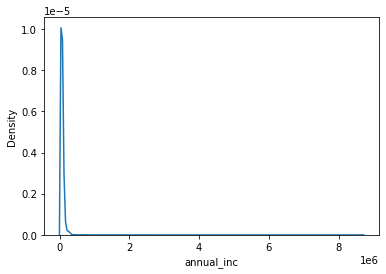

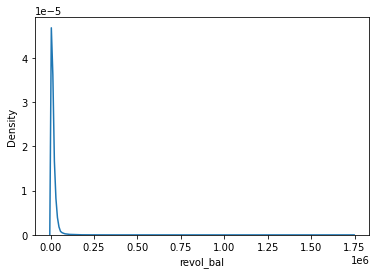

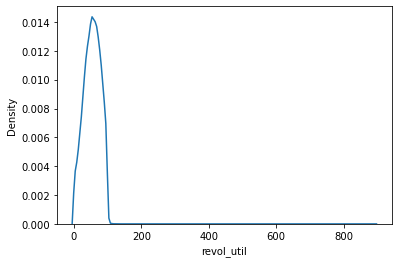

In [1355]:
columns = ['annual_inc','revol_bal','revol_util']
for column in columns:
    sns.kdeplot(x = df[column])
    plt.show()

In [1356]:
## Since the above 3 graphs are log normal distributed, we'll apply log function and shift it by one to get a normal dist.
df['annual_inc'] += 1
df['revol_bal'] += 1
df['revol_util'] += 1
df['annual_inc'] = np.log(df['annual_inc'])
df['revol_bal'] = np.log(df['revol_bal'])
df['revol_util'] = np.log(df['revol_util'])

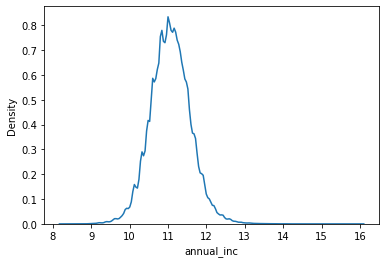

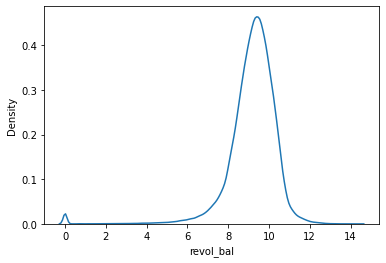

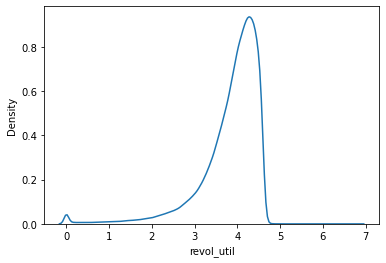

In [1357]:
columns = ['annual_inc','revol_bal','revol_util']
for column in columns:
    sns.kdeplot(x = df[column])
    plt.show()



## Feature Engineering

In [1358]:
df['term'] = df['term'].apply(lambda x:x.split(' ')[1])
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,11.669938,Not Verified,...,vacation,26.24,Jun-1990,16.0,0.0,10.501500,3.756538,25.0,0.0,0
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,11.082158,Not Verified,...,debt_consolidation,22.05,Jul-2004,17.0,0.0,9.910066,3.994524,27.0,3.0,0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,10.670303,Source Verified,...,credit_card,12.79,Aug-2007,13.0,0.0,9.391661,4.534748,26.0,0.0,0
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,10.896758,Not Verified,...,credit_card,2.60,Sep-2006,6.0,0.0,8.607582,3.113515,13.0,0.0,0
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,10.915107,Verified,...,credit_card,33.95,Mar-1999,13.0,0.0,10.109892,4.259859,43.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,2 years,RENT,10.596660,Source Verified,...,debt_consolidation,15.63,Nov-2004,6.0,0.0,7.596392,3.563883,23.0,0.0,0
396026,21000.0,36,12.29,700.42,C,C1,5 years,MORTGAGE,11.608245,Source Verified,...,debt_consolidation,21.45,Feb-2006,6.0,0.0,10.675076,4.571613,8.0,1.0,0
396027,5000.0,36,9.99,161.32,B,B1,10+ years,RENT,10.942014,Verified,...,debt_consolidation,17.56,Mar-1997,15.0,0.0,10.395283,4.218036,23.0,0.0,0
396028,21000.0,60,15.31,503.02,C,C2,10+ years,MORTGAGE,11.066654,Verified,...,debt_consolidation,15.88,Nov-1990,9.0,0.0,9.661734,4.003690,20.0,5.0,0


In [1359]:
df['grade'].value_counts()

B    115900
C    105833
A     64165
D     63339
E     31348
F     11707
G      3027
Name: grade, dtype: int64

In [1360]:
grade_mapping = {'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
sub_grade_mapping = {'A1':35,'A2':34,'A3':33,'A4':32,'A5':31,'B1':30,'B2':29,'B3':28,'B4':27,'B5':26,'C1':25,
'C2':24,'C3':23,'C4':22,'C5':21,'D1':20,'D2':19,'D3':18,'D4':17,'D5':16,'E1':15,'E2':14,'E3':13,'E4':12,'E5':11,'F1':10,
'F2':9,'F3':8,'F4':7,'F5':6,'G1':5,'G2':4,'G3':3,'G4':2,'G5':1}
df['sub_grade'] = df['sub_grade'].replace(sub_grade_mapping)
df['grade'] = df['grade'].replace(grade_mapping)
term_mapping = {'36':0,'60':1}
df['term'] = df['term'].replace(term_mapping)
 

In [1361]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [1362]:
emp_length_mapping = {'10+ years':10, '4 years':4, '< 1 year':0.5, '6 years':6, '9 years':9,
       '2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length'] = df['emp_length'].replace(emp_length_mapping)

In [1363]:
df['home_ownership'] = df['home_ownership'].replace({'ANY':'OTHER','NONE':'OTHER'})
home_ownership_mapping = {'OTHER':0,'RENT':1,'MORTGAGE':2,'OWN':3}
df['home_ownership'] = df['home_ownership'].replace(home_ownership_mapping)

In [1364]:
df['home_ownership'].value_counts()

2    197935
1    159573
3     37665
0       146
Name: home_ownership, dtype: int64

In [1365]:
# Considering only year of joining for 'earliest_cr_line' column.
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year  

In [1366]:
# Adding new features by getting month and year from issue_d,column
# Considering the current year as 2022,we'll calculate the time period for earliest_cr_line and issue_d_year
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  

df['credit_history'] = df['issue_d_year'] - df['earliest_cr_line']

In [1367]:
df.drop(['issue_d','issue_d_month','earliest_cr_line'],axis=1,inplace=True)

In [1368]:
cap_columns = ['pub_rec_bankruptcies','mort_acc','pub_rec']
for column in cap_columns:
    df[column] = np.where(df[column]>1,1,0)
    

In [1369]:
df['pub_rec'].value_counts()

0    387316
1      8003
Name: pub_rec, dtype: int64

In [1370]:
df['verification_status'].value_counts()

Verified           139167
Source Verified    131211
Not Verified       124941
Name: verification_status, dtype: int64

In [1371]:
verification_status_mapping = {'Source Verified':2,'Verified':1,'Not Verified':0}
df['verification_status'] = df['verification_status'].replace(verification_status_mapping)

In [1372]:
df['inst_amnt_ratio'] = df['installment']/df['loan_amnt']

In [1373]:
df.drop(['loan_amnt','installment'],axis=1,inplace=True)

In [1374]:
df['account_ratio'] = df['open_acc']/df['total_acc']

In [1375]:
df.drop(['open_acc','total_acc'],axis=1,inplace=True)

In [1376]:
le = LabelEncoder()
le.fit(df['purpose'])
df['purpose'] = le.transform(df['purpose'])

In [1377]:
df['loan_status'] = df['loan_status'].replace({'Fully Paid':0,'Charged Off':1})
df['loan_status'].value_counts()

0    317802
1     77517
Name: loan_status, dtype: int64

In [1378]:
df

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,issue_d_year,credit_history,inst_amnt_ratio,account_ratio
0,0,11.44,6,27,10.0,1,11.669938,0,0,12,26.24,0,10.501500,3.756538,0,0,2015,25,0.032948,0.640000
1,0,11.99,6,26,4.0,2,11.082158,0,0,2,22.05,0,9.910066,3.994524,1,0,2015,11,0.033210,0.629630
2,0,10.49,6,28,0.5,1,10.670303,2,0,1,12.79,0,9.391661,4.534748,0,0,2015,8,0.032498,0.500000
3,0,6.49,7,34,6.0,1,10.896758,0,0,1,2.60,0,8.607582,3.113515,0,0,2014,8,0.030646,0.461538
4,1,17.27,5,21,9.0,2,10.915107,1,1,1,33.95,0,10.109892,4.259859,0,0,2013,14,0.024998,0.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,10.99,6,27,2.0,1,10.596660,2,0,2,15.63,0,7.596392,3.563883,0,0,2015,11,0.021738,0.260870
396026,0,12.29,5,25,5.0,2,11.608245,2,0,2,21.45,0,10.675076,4.571613,0,0,2015,9,0.033353,0.750000
396027,0,9.99,6,30,10.0,1,10.942014,1,0,2,17.56,0,10.395283,4.218036,0,0,2013,16,0.032264,0.652174
396028,1,15.31,5,24,10.0,2,11.066654,1,0,2,15.88,0,9.661734,4.003690,1,0,2012,22,0.023953,0.450000


In [1379]:
df = df.sort_values('issue_d_year')

In [1380]:
### Selecting Top Best features

In [1381]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfpvalue,dfscores],axis=1)
featureScores.columns = ['Specs','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features

                  Specs         pvalue         Score
2             sub_grade   0.000000e+00  22948.824965
1              int_rate   0.000000e+00  20611.853218
0                  term   0.000000e+00  11051.488974
6                   dti   0.000000e+00   4944.628139
4            annual_inc   0.000000e+00   2078.475707
5   verification_status   0.000000e+00   1665.771009
11      inst_amnt_ratio   0.000000e+00   1528.358781
7            revol_util   0.000000e+00   1514.093525
12        account_ratio  4.783761e-235   1073.473591
8              mort_acc  1.057354e-129    587.671469
3        home_ownership   8.553678e-98    440.777593
10       credit_history   9.074413e-43    187.969468


/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [1382]:
drop_columns = ['revol_bal','pub_rec','emp_length','purpose','grade','issue_d_year']
df.drop(drop_columns,axis=1,inplace=True)

In [1383]:
### We can split the data based on the issue date. The previous records can be taken as training data and
## latest records will be treated as test data

In [1384]:
split_ratio = 0.8
train_data_index = int(len(df)*0.8)
train_data_index

316255

In [1385]:
df_train = df.iloc[:train_data_index,:]

In [1386]:
df_train['loan_status'].value_counts(normalize=True)

0    0.806779
1    0.193221
Name: loan_status, dtype: float64

In [1387]:
df_test = df.iloc[train_data_index:,:]

In [1388]:
df_test['loan_status'].value_counts(normalize=True)

0    0.792447
1    0.207553
Name: loan_status, dtype: float64

In [1389]:
y_train = df_train['loan_status']
X_train = df_train.drop('loan_status',axis=1)
y_test = df_test['loan_status']
X_test = df_test.drop('loan_status',axis=1)

In [1390]:
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (316255, 13)
y_train shape : (316255,)
X_test shape : (79064, 13)
y_test shape : (79064,)


In [1391]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns =X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns =X_test.columns)
  

In [1392]:
X_train_scaled

,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,dti,revol_util,mort_acc,pub_rec_bankruptcies,credit_history,inst_amnt_ratio,account_ratio
0,-0.540758,-1.353441,1.361796,2.094530,-0.044831,-1.233322,-1.717057,-1.392366,-0.793098,0.0,-1.202862,-0.086559,1.539572
1,-0.540758,-1.426497,1.514801,2.094530,-0.652905,-1.233322,-2.013290,-5.555205,-0.793098,0.0,0.052541,-0.121724,-0.160852
2,-0.540758,-0.705069,-0.015253,-1.075057,-0.101488,-1.233322,0.012234,-2.380837,-0.793098,0.0,3.121302,0.231162,-0.378855
3,-0.540758,-0.271300,-0.933285,0.509737,0.566135,-1.233322,-1.347399,-1.868121,-0.793098,0.0,0.610497,0.447986,-0.258953
4,-0.540758,-0.921954,0.443763,-1.075057,-4.864195,-1.233322,0.123638,-0.817479,-0.793098,0.0,-1.760819,0.124075,1.334027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316250,-0.540758,-1.255272,0.902780,0.509737,0.425360,0.020138,0.457850,-1.353195,-0.793098,0.0,-0.644905,-0.039263,-0.474776
316251,-0.540758,-0.316960,0.137753,-1.075057,-0.529201,1.273598,1.680760,-1.300089,-0.793098,0.0,-0.784394,0.425152,1.428894
316252,1.849256,3.112103,-3.075361,-1.075057,1.849105,1.273598,0.537605,0.389047,-0.793098,0.0,-0.644905,-0.206903,-0.530925
316253,-0.540758,0.071150,-0.321264,-1.075057,-0.976982,0.020138,1.088294,0.393640,-0.793098,0.0,1.168454,0.621755,-0.858461


In [1393]:
X_train.shape

(316255, 13)

## Model Building

In [1411]:
model = LogisticRegression(
        penalty='l2',
        C=0.5,
        solver = 'lbfgs',
        max_iter=300,
        n_jobs=-1,
        class_weight='balanced'
)
model.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=300, n_jobs=-1)

In [1412]:
## Model coef_ with column names
data = {'Feature':np.array(X_train.columns),'Importance':np.array(model.coef_[0]),
        'abs':np.array(np.abs(model.coef_)[0])}
feature_importance = pd.DataFrame(data)
feature_importance.sort_values('abs',ascending=False)

,Feature,Importance,abs
12,account_ratio,0.508208,0.508208
0,term,0.484184,0.484184
4,annual_inc,-0.371017,0.371017
11,inst_amnt_ratio,0.135093,0.135093
5,verification_status,0.105721,0.105721
2,sub_grade,-0.097565,0.097565
3,home_ownership,-0.087471,0.087471
8,mort_acc,-0.065232,0.065232
7,revol_util,0.061569,0.061569
1,int_rate,-0.028240,0.028240


## Result Evaluation

In [1428]:
X_test_pred_prob = model.predict_proba(X_test)[:,1]
X_train_pred_prob = model.predict_proba(X_train)[:,1] 

In [1429]:
X_test_pred = model.predict(X_test)
X_train_pred = model.predict(X_train)

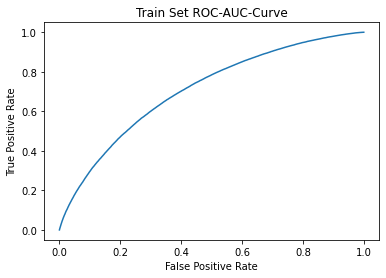

In [1439]:
roc_curve(y_train,train_pred_prob)
fpr,tpr,thresholds = roc_curve(y_train,train_pred_prob,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train Set ROC-AUC-Curve")
plt.show()

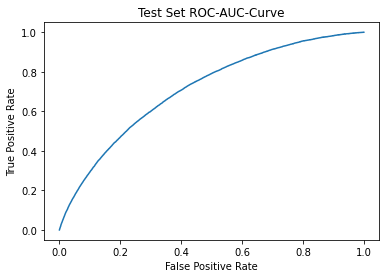

In [1438]:
fpr,tpr,thresholds = roc_curve(y_test,test_pred_prob,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test Set ROC-AUC-Curve")
plt.show()

In [1430]:
test_precision,test_recall,_ = precision_recall_curve(y_test, X_test_pred_prob)

<div class="alert alert-block alert-success">
<b>Comment:</b> The ROC AUC Curve have a good Area Under the Curve. This means the model is performing well.
</div>

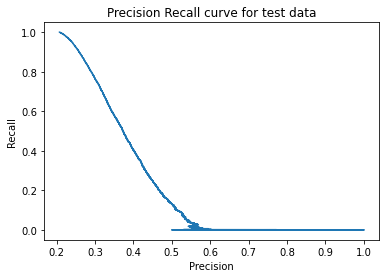

In [1440]:
plt.plot(test_precision,test_recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall curve for test data")
plt.show()

In [1441]:
train_precision,train_recall,_ = precision_recall_curve(y_train, X_train_pred)

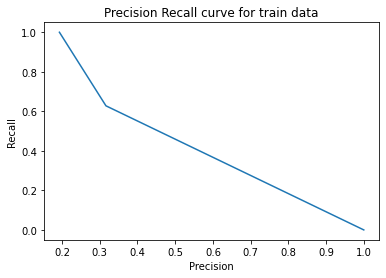

In [1442]:
plt.plot(train_precision,train_recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall curve for train data")
plt.show()

<div class="alert alert-block alert-success">
<b>Comment:</b> The precision recall curve shows that as the precision increased the recall starts descreasing. As per our use case we need to have high recall(So that we can predict defaulters accurately) and avoid Non-performing Asset. 
</div>

Confusion Matrix for Test data


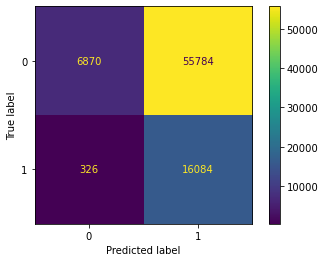

In [1443]:
print("Confusion Matrix for Test data")
matrix = confusion_matrix(y_test,test_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(matrix,display_labels=model.classes_)
disp.plot()
plt.show()

Confusion Matrix for Train data


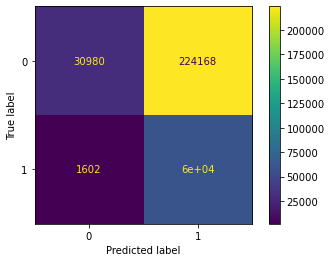

In [1444]:
print("Confusion Matrix for Train data")
matrix = confusion_matrix(y_train,train_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(matrix,display_labels=model.classes_)
disp.plot()
plt.show()

<div class="alert alert-block alert-success">
<b>Comment:</b> The confusion Matrix shows that our model it correctly identifying most of the defaulters but it also marking most of the fully paid as defaulters. This will lead to a loss of opportunity.
</div>

In [1447]:
print("classification report for Test set.")
print(classification_report(y_test,test_pred))

classification report for Test set.
              precision    recall  f1-score   support

           0       0.95      0.11      0.20     62654
           1       0.22      0.98      0.36     16410

    accuracy                           0.29     79064
   macro avg       0.59      0.54      0.28     79064
weighted avg       0.80      0.29      0.23     79064



In [1448]:
print("Classification report for Train set.")
print(classification_report(y_train,train_pred))

Classification report for Train set.
              precision    recall  f1-score   support

           0       0.95      0.12      0.22    255148
           1       0.21      0.97      0.35     61107

    accuracy                           0.29    316255
   macro avg       0.58      0.55      0.28    316255
weighted avg       0.81      0.29      0.24    316255



<div class="alert alert-block alert-success">
<b>Comment:</b> To make sure we have less False positives and also high recall, we can try different threshold value 
    and balance those. We can also use f1-score as the metric in case both identifying a defaulter and reducing False positive is important.
</div>

<div class="alert alert-block alert-success">
<b>Comment:</b>To make sure we have high rate of identifying defaulters, we have kept a high recall 
    for class 1(i.e. defaulter class) </div>

<div class="alert alert-block alert-info">
<b>Insights:</b> Following are the insights which can be derived from the analysis</br>
    - People with 10+ years of experience usually apply for a loan.</br>
    - Most of the people applying for a loan either have a mortgage or live on rent.</br>
    - Most of the people apply for loan for either debt consolidation or credit card payment.</br>
    - People with low dti are more likely to pay off the loan in comparision to people with high dti.</br>
    - People with high annual income usually pay off their debt except few exceptions.</br>
</div>

<div class="alert alert-block alert-info">
<b>Business Recommendations:</b> Following are the Business recommendations which can be derived from the analysis</br>
    - Banks should target high income people since they are more likely to pay off their loan.</br>
    - Based on the model output, Banks should also do a manual check so as to avoid opportunity cost.</br>
    - Banks should work on maintaining a balance between bad debt and opportunity cost. Playing too safe will lead to loss of business.</br>
    - Banks can target people with low dti, since they are more likely to pay off their debt.</br>
    - The above model will play a safe game and accurately predict defaulters but in the process it will also mark some potential clients as defaulters. In case some potential client is marked as defaulter, banks can set up a team to look into these kind of cases.</br>
</div>

### Questionnaire

In [1582]:
df = pd.read_csv('logistic_regression.txt')
df = df[df['application_type']=='INDIVIDUAL']

#### How many people fully paid their loan

In [1583]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803913
Charged Off    0.196087
Name: loan_status, dtype: float64

#### Comment about the correlation between Loan Amount and Installment features.


In [1584]:
## There is a high correlation between loan_amnt and installment
df[['loan_amnt','installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953945
installment,0.953945,1.000000


#### The majority of people have home ownership as _______.


In [1585]:
## Most of the people have home ownership as mortgage
df['home_ownership'].value_counts()

MORTGAGE    197935
RENT        159573
OWN          37665
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

#### People with grades ‘A’ are more likely to fully pay their loan. (T/F)

[]

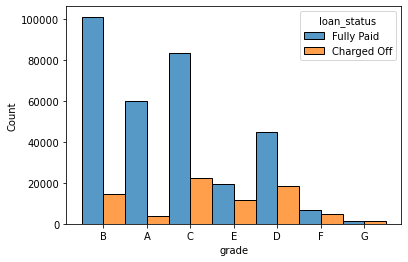

In [1586]:
## This is False. B Grade people are more likely to pay their loan.
sns.histplot(binwidth=1,
            x='grade',
            hue='loan_status',
            data=df,
            stat="count",
            multiple="dodge")
plt.plot()

#### Name the top 2 afforded job titles.


In [1587]:
## Teacher and Manager are the most afforded job titles
df['emp_title'].value_counts(normalize=True).sort_values(ascending=False)

Teacher                        0.011738
Manager                        0.011373
Registered Nurse               0.004970
RN                             0.004948
Supervisor                     0.004897
                                 ...   
VIP IT Technical Lead          0.000003
Gull Lake Community Schools    0.000003
crane lear romec               0.000003
M.C. Dean                      0.000003
Gracon Services, Inc           0.000003
Name: emp_title, Length: 172922, dtype: float64

#### Thinking from a bank's perspective, which metric should our primary focus be on..
    -ROC AUC
    -Precision
    -Recall
    -F1 Score

Banks don't want to have any bad debt and thus they need to accurately identify prospective defaulters based on their application. Thus recall will be the metric they'll focus more on.

### How does the gap in precision and recall affect the bank?


Banks will have a tradeoff between opportunity cost v/s bad debt. If they have a high recall then they'll avoid bad debt and if they have high precision they can have high chances of getting a oppurtunity of lending loan but this will come with a risk of bad debt.

#### Which were the features that heavily affected the outcome?


The features having high impact on output are:
- term 
- annual_inc
- verification_status
- sub_grade
- home_ownership

#### Will the results be affected by geographical location? (Yes/No)


In [1588]:
df['new_address'] = df['address'].apply(lambda x: x[-8:])

In [1589]:
df['location'],df['zip'] = df['new_address'].apply(lambda x:x.split(' ')[0]),df['new_address'].apply(lambda x:x.split(' ')[1])

In [1590]:
df['location']

0         OK
1         SD
2         WV
3         MA
4         VA
          ..
396025    DC
396026    LA
396027    NY
396028    FL
396029    AR
Name: location, Length: 395319, dtype: object

In [1591]:
data = pd.DataFrame(df.groupby(['location','loan_status']).size().sort_values(ascending=False)).reset_index()

In [1592]:
new_data = pd.merge(data,data,left_on='location',right_on='location')

In [1593]:
newly_data = new_data[new_data['loan_status_x']!=new_data['loan_status_y']]

In [1594]:
newly_data.drop_duplicates(subset=['location'],inplace=True)
newly_data['ratio_paid_to_charge_off'] = newly_data['0_x']/newly_data['0_y']

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/kq/0bdtsq2j33760qf6gclvdx840000gn/T/ipykernel_1303/2418094103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_data['ratio_paid_to_charge_off'] = newly_data['0_x']/newly_data['0_y']


In [1595]:
df_ratio = newly_data.sort_values('ratio_paid_to_charge_off',ascending=False)

In [1596]:
df_ratio.head()

,location,loan_status_x,0_x,loan_status_y,0_y,ratio_paid_to_charge_off
33,MN,Fully Paid,5644,Charged Off,1246,4.529695
21,NY,Fully Paid,5687,Charged Off,1304,4.361196
77,OR,Fully Paid,5583,Charged Off,1307,4.271614
97,CA,Fully Paid,5574,Charged Off,1311,4.251716
29,VT,Fully Paid,5659,Charged Off,1331,4.251690


In [1597]:
df_ratio.tail()

,location,loan_status_x,0_x,loan_status_y,0_y,ratio_paid_to_charge_off
189,WA,Fully Paid,5496,Charged Off,1391,3.951114
61,NV,Fully Paid,5604,Charged Off,1419,3.949260
209,PA,Fully Paid,5434,Charged Off,1383,3.929140
177,WV,Fully Paid,5515,Charged Off,1415,3.897527
205,WY,Fully Paid,5481,Charged Off,1438,3.811544


#### There doesn't seem to be much relation between location and loan status since the ratio is somethat similar